<h1><center><font size="15">APRENDIZAJE AUTOMÁTICO (ISI-306)</font></center></h1>

<img src="Logo_1.jpg" width=800 height=600 />

<h1><center><font size="5">EXPOSICIÓN 1: REGRESIÓN</font></center></h1>

# CASO 1 - VACUNAS Y POBLACIÓN
#### ING: K. MARLON SOZA MAMANI
## Nombre:

### Rosalía Reynaga Funes

## Tenga en cuenta:

Que el gobierno intenta saber una fecha estimada donde pueda ser posible que la mayor parte de la población (sino toda) esté protegida por al menos una vacuna. Así mismo también le interesaría saber cuantas vacunas debería comprar mensualmente y cuantas vacunas necesita comprar a partir de hoy para lograr ese cometido.


Utilice el datasheet de la siguiente pagina:

https://www.kaggle.com/datasets/sinakaraji/covid-vaccination-vs-death?resource=download


Importación de librerías:

In [2]:
# Importamos las librerias de OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
%matplotlib inline

## Importación y segregación de datos

In [3]:
# --- Inserte código aqui
data = pd.read_csv('covid-vaccination-vs-death_ratio.csv')
bolivia_data = data[data["country"] == "Bolivia (Plurinational State of)"]
bolivia_data
#--------------------------------------------------------

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
3558,3558,Bolivia (Plurinational State of),BOL,2021-02-20,10313.0,10301.0,12.0,50,11927124.0,0.086366
3559,3559,Bolivia (Plurinational State of),BOL,2021-02-21,10313.0,10301.0,12.0,37,11927124.0,0.086366
3560,3560,Bolivia (Plurinational State of),BOL,2021-02-22,10511.0,10301.0,210.0,27,11927124.0,0.086366
3561,3561,Bolivia (Plurinational State of),BOL,2021-02-23,11331.0,10301.0,1030.0,24,11927124.0,0.086366
3562,3562,Bolivia (Plurinational State of),BOL,2021-02-24,12935.0,10301.0,2634.0,29,11927124.0,0.086366
...,...,...,...,...,...,...,...,...,...,...
3943,3943,Bolivia (Plurinational State of),BOL,2022-03-14,12852280.0,7009674.0,5706717.0,0,11927124.0,58.770865
3944,3944,Bolivia (Plurinational State of),BOL,2022-03-15,12873007.0,7018188.0,5707499.0,2,11927124.0,58.842249
3945,3945,Bolivia (Plurinational State of),BOL,2022-03-17,12931726.0,7033766.0,5726736.0,0,11927124.0,58.972859
3946,3946,Bolivia (Plurinational State of),BOL,2022-03-18,12962871.0,7040304.0,5744901.0,1,11927124.0,59.027675


Conversion de la columna date

In [4]:
bolivia_fecha_y_vacunados = bolivia_data[["date", "people_vaccinated"]].to_numpy()

for i in range(len(bolivia_fecha_y_vacunados)):
    fecha = datetime.strptime(bolivia_fecha_y_vacunados[i, 0], '%Y-%m-%d')
    bolivia_fecha_y_vacunados[i, 0] = fecha.toordinal()

verificamos que los tipos de datos con los que trabajaremos sean iguales 

In [5]:
d_fecha = pd.Series(bolivia_fecha_y_vacunados[:,0])
d_fecha.describe()

count        390
unique       390
top       737841
freq           1
dtype: int64

In [6]:
d_vacs = pd.Series(bolivia_fecha_y_vacunados[:,0])
d_vacs.describe()

count        390
unique       390
top       737841
freq           1
dtype: int64

## Inicio del modelo

Definimos la columna date como referencia (x) y la columna people_vaccinated como parámetro de interes(Y). Ademas dividimos la columna people_vaccinated entre 1000 para NORMALIZAR los datos

In [10]:
X = (bolivia_fecha_y_vacunados[:,0]) # "date" como referencia
Y = (bolivia_fecha_y_vacunados[:,1])/1000 # "vacunas" como parámetro de interés se reducion de 1000 para no manejar millones 

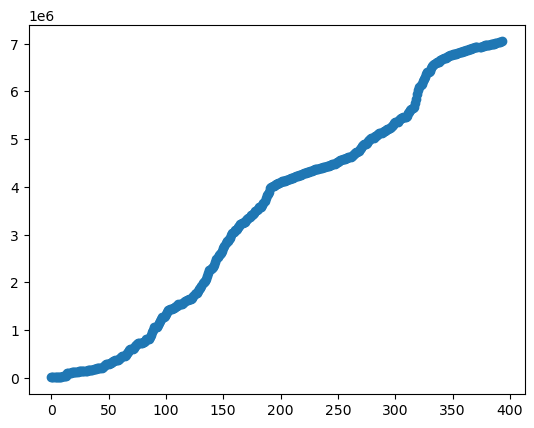

In [8]:
#empezamos x desde el  dia cero para tener dias apartir de la fecha 
Xnew = X-X[0];

plt.scatter(Xnew , Y)

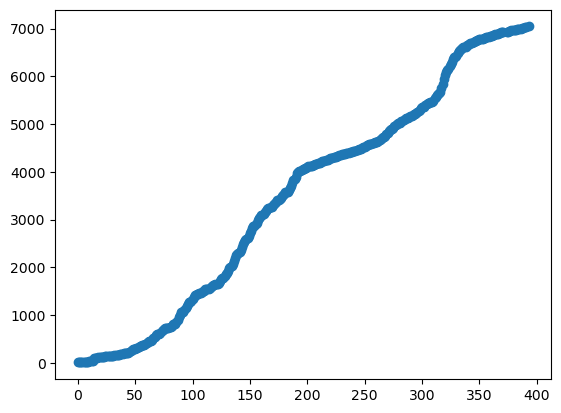

In [11]:
#empezamos x desde el  dia cero para tener dias apartir de la fecha 
Xnew = X-X[0];

plt.scatter(Xnew , Y)

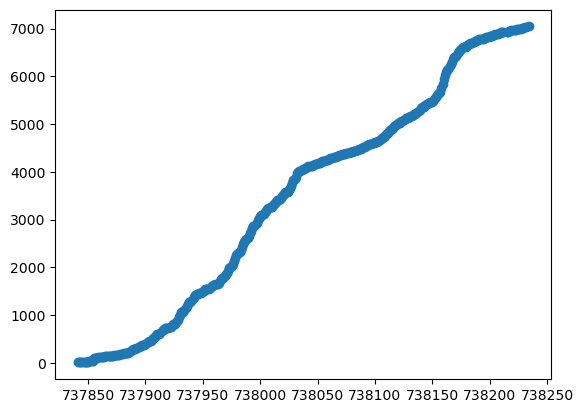

In [8]:
## Grafica con X sin empezar de cero
plt.scatter(X , Y)
plt.show()

## Parámetros del modelo de entrenamiento

In [9]:
w0 = 0 #Interceptor
w1 = 0 #Pendiente

n = 0.000000001 #Tamaño de paso
epochs = 150000 #Numero de Iterraciones
N = float(len(Xnew)) #Numero de elementos en X

Error = [0]*epochs
T = np.arange(1, epochs+1)


## Proceso de entrenamiento por medio de Gradiente Descendiente

In [10]:
#gradiente descendiente
for i in range(epochs):
    Y_pred = w0 + w1*Xnew #Modelo predecido
    Error[i] = sum((Y-Y_pred)**2)
    D_w0 = (-2)*sum(Y-Y_pred)
    D_w1 = (-2)*sum((Y-Y_pred)*Xnew)
    w0 = w0 - n*D_w0
    w1 = w1 - n*D_w1

In [11]:
print(w0,w1)

-13.983713562591058 18.467816341768742


## Modelo predecido

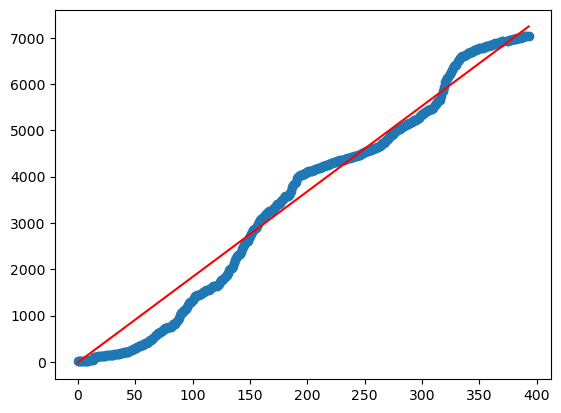

<Figure size 3500x1500 with 0 Axes>

In [12]:
Y_pred = w0 +w1*Xnew

plt.scatter(Xnew, Y)
plt.plot([min(Xnew), max(Xnew)],[min(Y_pred),max(Y_pred)],color='red')
#plt.plot(X,Y_pred,color='red')
plt.figure(figsize=(35,15))
plt.show()

## Comportamiento del Error

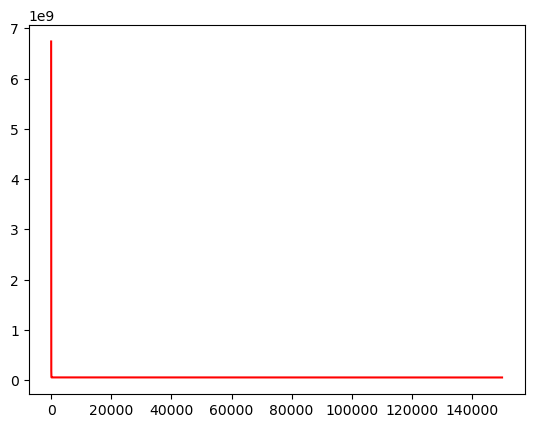

50850228.55973592


In [17]:
plt.plot(T, Error, '-r')
plt.show()
Min_E = min(Error)
print(Min_E)

## Pregunta 1: Calcular fecha

In [14]:
#calculando x para 11927124.0 (la poblacion total)
#Y_pred = w0 +w1*Xnew
x_t=((11927124.0/1000)-w0)/w1
print(x_t)

646.5901269851452


In [15]:
#calculando dias 
dias=x_t+X[0];
print(dias)

738487.5901269851


Conversion de int a date

In [19]:
fecha = datetime.fromordinal(738487)
fecha_str = fecha.strftime('%Y-%m-%d')

print("FECHA ESTIMADA 'YYYY-MM-DD':", fecha_str)

FECHA ESTIMADA 'YYYY-MM-DD': 2022-11-28


## Fecha estimada: 28/11/2022

Prediccion

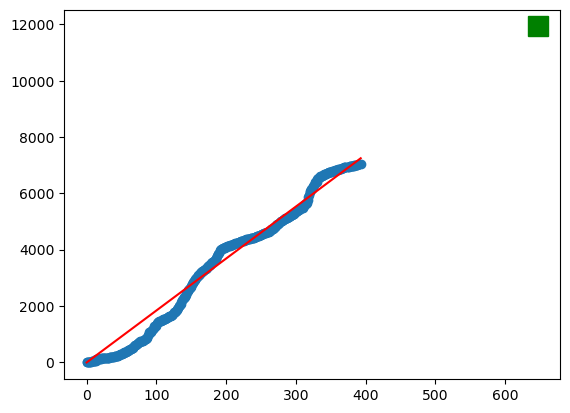

11927.123999999998


In [18]:
X_point = 646.5901269851452
Y_point = w0 + w1*X_point

plt.scatter(Xnew, Y)
plt.plot(X_point, Y_point, 'gs',markersize = 15)
plt.plot([min(Xnew), max(Xnew)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

print(Y_point)

## Pregunta 2 cantidad de vacunas mensuales
Para calcular la cantidad aproxima de vacunas que se deben comprar mensualmente usamos el modelo de prediccion

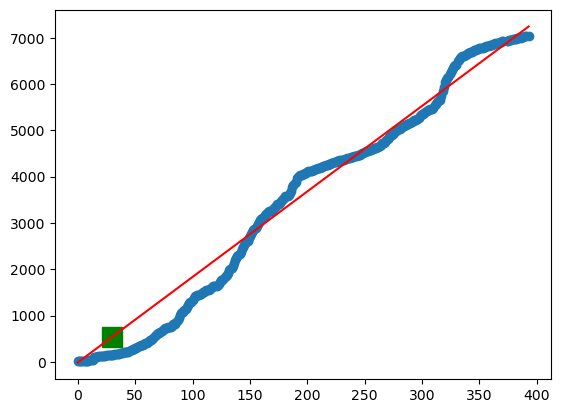

540.0507766904711
540050.7766904711


In [13]:

X_point = 30
Y_point = w0 + w1*X_point

plt.scatter(Xnew, Y)
plt.plot(X_point, Y_point, 'gs',markersize = 15)
plt.plot([min(Xnew), max(Xnew)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

print(Y_point)
print(Y_point*1000)

## Resultado: 540050.7766904711 vacunas mensuales